Steps used for data analysis:-

EDA: The first step in data analysis is to clean and preprocess the data.
Data Visualization: After cleaning the data, the next step is to visualize the data. i.e to seperate the Independent and dependent data.
Spliting: split the data into train and test data.
Model Training: linear regression.
Polynomial features: Application
Model Evaluation: After training the model, we need to evaluate its performance on the basis of its prediction.
Model Selection: Select the best model based on the evaluation metrics.
Model Deployment: Once we have selected the best model, we can deploy it.

In [2]:
!pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sklearn
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

EDA: The first step in data analysis is to clean and preprocess the data

In [4]:
df=pd.read_csv("E:\Ayush\Projects\shadowfox\HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.fillna(df.mean(),inplace=True)     

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Seperation of independent and dependent data

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
x=df.iloc[:,:-1]  
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [11]:
y=df["MEDV"]       
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

Spliting into training and test data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,shuffle=True ,random_state= 42)

In [13]:
xtrain

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.000000,18.10,0.0,0.6140,5.304,97.300000,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.000000,8.14,0.0,0.5380,5.834,56.500000,4.4986,4,307,21.0,395.62,8.47
332,0.03466,11.211934,6.06,0.0,0.4379,6.031,23.300000,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.000000,18.10,0.0,0.6140,6.103,68.518519,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.000000,8.14,0.0,0.5380,5.727,69.500000,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.000000,8.56,0.0,0.5200,5.836,91.900000,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.000000,6.96,0.0,0.4640,5.856,42.100000,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.000000,2.01,0.0,0.4350,6.635,29.700000,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.000000,18.10,0.0,0.7400,6.629,94.600000,2.1247,24,666,20.2,109.85,23.27


In [14]:
xtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.100000,0.0,0.597,4.628,100.000000,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.100000,0.0,0.740,6.461,93.300000,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.100000,0.0,0.597,6.657,100.000000,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.490000,0.0,0.449,6.015,45.100000,4.4272,3,247,18.5,395.99,12.86


In [15]:
ytrain

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [16]:
ytest

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [17]:
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


MODEL SELECTION for Model Training(Linear Regression)

In [18]:
model=LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [19]:
ytrainpred=model.predict(xtrain)
ytestpred=model.predict(xtest)     

In [20]:
xtrain[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.000000,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.000000,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,11.211934,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83


In [21]:
ytrain[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [22]:
ytrainpred[:3]

array([10.70222007, 19.39305504, 22.63386363])

In [23]:
xtest[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07


In [24]:
ytest[:3]

173    23.6
274    32.4
491    13.6
Name: MEDV, dtype: float64

In [25]:
ytestpred[:3]

array([29.14324958, 36.53566752, 14.49251294])

Model Evaluation

In [26]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 
    
   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.max(),actual.min()],[actual.max(),actual.min()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:22.410733172287678
RMSE:4.733997588960906
MAE:3.3583343610034238
R2 Score:0.7420299863537105


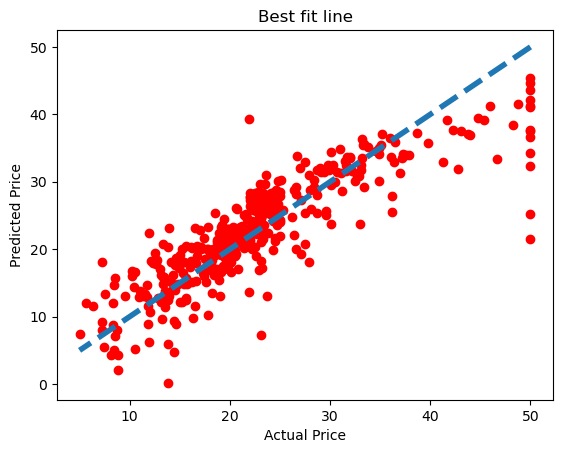

In [27]:
training_eval(ytrain,ytrainpred)

MSE:25.01767202384268
RMSE:5.0017668901941725
MAE:3.1499233573457857
R2 Score:0.6588520195508143


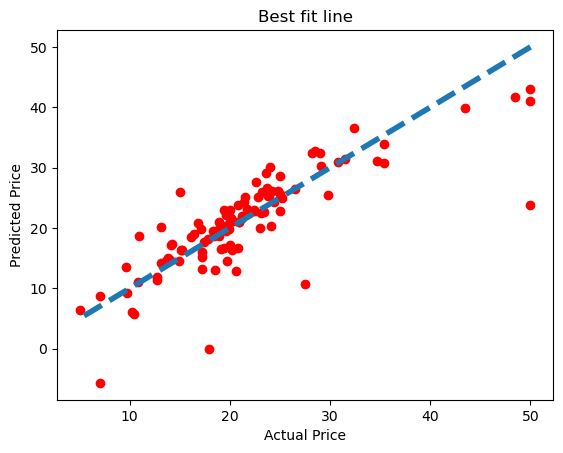

In [28]:
training_eval(ytest,ytestpred)

MODEL SELECTION for Model Training(Random Forest Regressor)

In [29]:
random = RandomForestRegressor()
random.fit(xtrain, ytrain)

RandomForestRegressor()

In [30]:
ytrainpredrandom=random.predict(xtrain)
ytestpredrandom=random.predict(xtest)

Model Evaluation

In [31]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line Polynomial Regression- training data")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:2.281418881188123
RMSE:1.5104366524909685
MAE:0.9434455445544548
R2 Score:0.9737385807332369


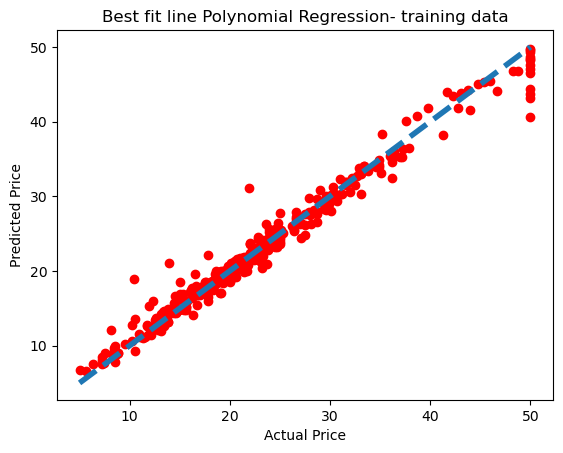

In [32]:
training_eval(ytrain,ytrainpredrandom)

MSE:8.923881735294115
RMSE:2.9872866844837835
MAE:2.0652450980392154
R2 Score:0.878311450047727


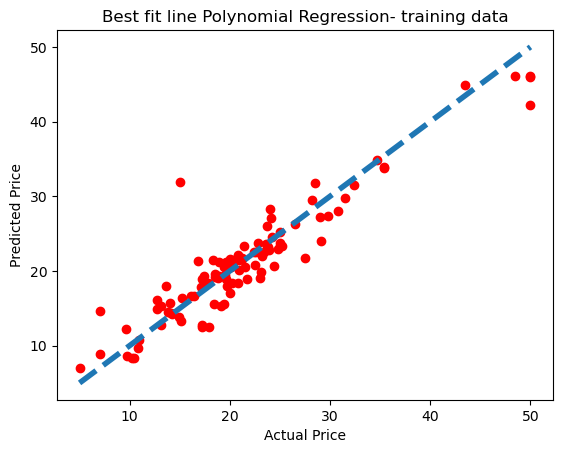

In [33]:
training_eval(ytest,ytestpredrandom)

MODEL SELECTION for Model Training(XGboost regression)

In [34]:
xgb = XGBRegressor()                
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
ytrainpredxgb=xgb.predict(xtrain)
ytestpredxgb=xgb.predict(xtest)

In [36]:
xtrain[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.000000,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.000000,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,11.211934,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83


In [37]:
ytrain[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [38]:
ytrainpredxgb[:3]

array([12.011957, 19.96016 , 19.384808], dtype=float32)

In [39]:
xtest[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07


In [40]:
ytest[:3]

173    23.6
274    32.4
491    13.6
Name: MEDV, dtype: float64

In [41]:
ytestpredxgb[:3]

array([25.023397, 30.504313, 15.572739], dtype=float32)

Model Evaluation

In [42]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:0.0004303257353722939
RMSE:0.02074429404371944
MAE:0.01409899716330045
R2 Score:0.9999950465192293


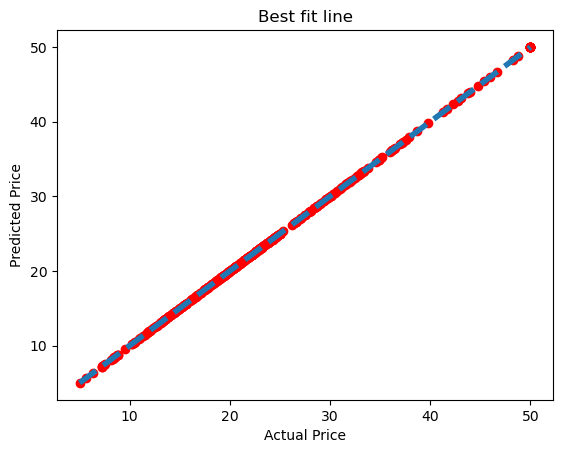

In [43]:
training_eval(ytrain,ytrainpredxgb)

MSE:6.237694900833565
RMSE:2.4975377676490833
MAE:1.9481419011658312
R2 Score:0.9149410458315418


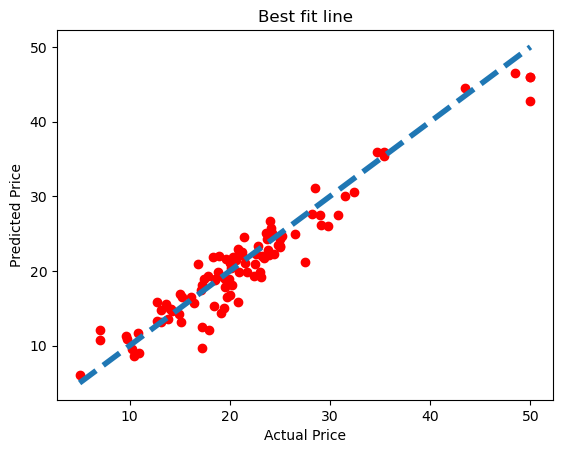

In [44]:
training_eval(ytest,ytestpredxgb)

Random Forest algorithm can be selected for hyperparametertuning based on its previous performance

Model Training(gridsearchCV on Random forest model)

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples per leaf
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [46]:
best_rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

Train MAE: 1.1899654276313616
Train MSE: 4.247816479860441
Train RMSE: 2.061023163348836
Train R² Score: 0.9511033723505499


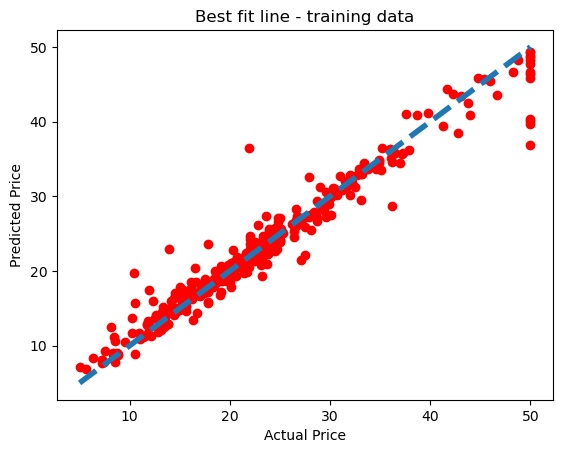

In [47]:
ytrainpred = best_rf.predict(xtrain)
train_r2 = r2_score(ytrain, ytrainpred)
mean_train_mae = mean_absolute_error(ytrain, ytrainpred)
mean_train_mse = mean_squared_error(ytrain, ytrainpred)
mean_train_rmse = np.sqrt(mean_train_mse)
print("Train MAE:", mean_train_mae)
print("Train MSE:", mean_train_mse)
print("Train RMSE:", mean_train_rmse)
print("Train R² Score:", train_r2)

plt.scatter(ytrain, ytrainpred, color='r')
plt.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], lw=4, ls='--')
plt.title("Best fit line - training data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Test MAE: 2.171487533653709
Test MSE: 10.440570622249878
Test RMSE: 3.231187184650539
Test R² Score: 0.8576294557254109


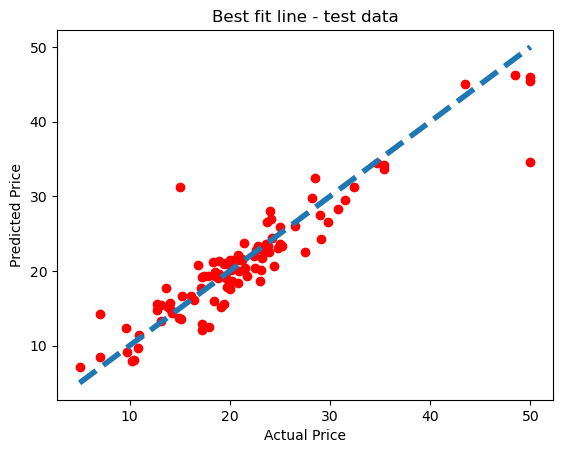

In [48]:
ytestpred = best_rf.predict(xtest)
test_r2 = r2_score(ytest, ytestpred)
mean_test_mae = mean_absolute_error(ytest, ytestpred)
mean_test_mse = mean_squared_error(ytest, ytestpred)
mean_test_rmse = np.sqrt(mean_test_mse)
print("Test MAE:", mean_test_mae)
print("Test MSE:", mean_test_mse)
print("Test RMSE:", mean_test_rmse)
print("Test R² Score:", test_r2)

plt.scatter(ytest, ytestpred, color="r")
plt.plot([ytest.min(), ytest.max()],[ytest.min(), ytest.max()], lw=4, ls="--")
plt.title("Best fit line - test data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


Algorithm Used: Random Forest Regressor (selected as the best model among linear and XGBoost)

Hyperparameter Tuning: Used GridSearchCV to find the optimal parameters

Performance Metrics for test data:
Test MAE: 2.171487533653709
Test MSE: 10.440570622249878
Test RMSE: 3.231187184650539
Test R² Score: 0.8576294557254109